In [100]:
from avg_pooling import *
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout, Activation
import gc
from keras.callbacks import EarlyStopping
import pickle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




#history= model.fit(x, y, batch_size=32, nb_epoch=200, validation_split=0.15, verbose=0, callbacks=[early_stop_])

## UFC11

In [122]:
model = Sequential()
model.add(Dense(200, input_dim=2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop_= EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='auto')

In [131]:
data0=pickle.load(open('data/2048 features/data_0.p', 'rb'))
data1=pickle.load(open('data/2048 features/data_1.p', 'rb'))
data2=pickle.load(open('data/2048 features/data_2.p', 'rb'))

In [132]:
data=data0[0]+data1[0]+data2[0]
label=np.array(data0[1]+data1[1]+data2[1])
del data0
del data1
del data2
data_mean=[np.mean(x, axis=0) for x in data]
print (len(data))
#data=np.array(data)
indexes=[]
data_prototype=[]
label_prototype=[]

# create files with prototypes
for x in range (11):
    index=np.where(label==x)[0][0]
    print (index)
    indexes.append(index)
    data_prototype(data_mean[index])
    label_prototype(label[x])
data=[x for x, i in enumerate(data) if i not in indexes]
label=[x for x, i in enumerate(label) if i not in indexes]
#New data
data=np.array(data)
label=np.array(label)

pickle.dump([np.array(data_prototype), np.array(label_prototype)],open('proto_ucf11.p', 'wb'), protocol=2)
del data_mean

In [135]:
np.where(label==0)[0][0]

0

In [124]:
data=data0[0]+data1[0]+data2[0]
label=np.array(data0[1]+data1[1]+data2[1])
del data0
del data1
del data2
data=[np.mean(x, axis=0) for x in data]
data=np.array(data)
#label=np.array(label)
from sklearn.utils import shuffle
data, label=shuffle(data, label)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.15, random_state=32)



In [125]:
X_train.shape

(1338, 2048)

In [126]:
history= model.fit(X_train, y_train, batch_size=32, nb_epoch=300, validation_split=0.15, callbacks=[early_stop_])

c:\users\hp\anaconda2\envs\translator\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1137 samples, validate on 201 samples
Epoch 1/300
1137/1137 [==============================] - 1s 1ms/step - loss: 7.2646 - acc: 0.2832 - val_loss: 1.1041 - val_acc: 0.6269
Epoch 2/300
1137/1137 [==============================] - 1s 450us/step - loss: 1.4418 - acc: 0.5110 - val_loss: 0.6435 - val_acc: 0.8209
Epoch 3/300
1137/1137 [==============================] - 1s 453us/step - loss: 0.9862 - acc: 0.6746 - val_loss: 0.6284 - val_acc: 0.8209
Epoch 4/300
1137/1137 [==============================] - 1s 450us/step - loss: 0.7154 - acc: 0.7476 - val_loss: 0.4278 - val_acc: 0.8806
Epoch 5/300
1137/1137 [==============================] - 1s 457us/step - loss: 0.6285 - acc: 0.7916 - val_loss: 0.3707 - val_acc: 0.8706
Epoch 6/300
1137/1137 [==============================] - 1s 460us/step - loss: 0.4479 - acc: 0.8522 - val_loss: 0.4058 - val_acc: 0.8856
Epoch 7/300
1137/1137 [==============================] - 1s 450us/step - loss: 0.3994 - acc: 0.8628 - val_loss: 0.2958 - val_acc: 0.9

In [127]:
y_test=to_categorical(y_test)
prediction=model.predict(X_test)
t=np.argmax(prediction, axis=1)
pred=to_categorical(t)
accuracy_score(y_test, pred)

0.9240506329113924

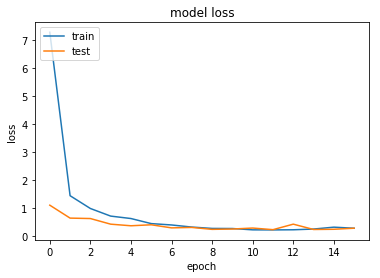

In [128]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

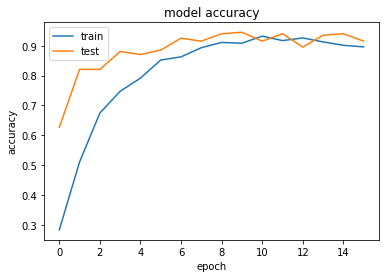

In [129]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## UFC 50

In [96]:
model = Sequential()
model.add(Dense(200, input_dim=2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
data=pickle.load(open('data/UCF 50/data_0.p', 'rb'))
label=data[1]
data=data[0]
for x in range (1,10):
    name='data/UCF 50/data_'+str(x)+'.p'
    data_n=pickle.load(open(name, 'rb'))
    data=data+data_n[0]
    label=label+data_n[1]
    
    

In [94]:
data=[np.mean(x, axis=0) for x in data]
data=np.array(data)
label=np.array(label)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.15, random_state=42)
y_train=to_categorical(y_train)

In [97]:
history= model.fit(X_train, y_train, batch_size=32, nb_epoch=300, validation_split=0.15, callbacks=[early_stop_])

c:\users\hp\anaconda2\envs\translator\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 4823 samples, validate on 852 samples
Epoch 1/300
4823/4823 [==============================] - 3s 684us/step - loss: 4.1761 - acc: 0.0954 - val_loss: 2.9364 - val_acc: 0.2500
Epoch 2/300
4823/4823 [==============================] - 2s 477us/step - loss: 2.7859 - acc: 0.2498 - val_loss: 1.9554 - val_acc: 0.4413
Epoch 3/300
4823/4823 [==============================] - 2s 492us/step - loss: 2.3105 - acc: 0.3450 - val_loss: 1.6168 - val_acc: 0.5235
Epoch 4/300
4823/4823 [==============================] - 2s 490us/step - loss: 1.9223 - acc: 0.4286 - val_loss: 1.3379 - val_acc: 0.5962
Epoch 5/300
4823/4823 [==============================] - 2s 481us/step - loss: 1.8134 - acc: 0.4551 - val_loss: 1.2635 - val_acc: 0.6585
Epoch 6/300
4823/4823 [==============================] - 2s 489us/step - loss: 1.6004 - acc: 0.5140 - val_loss: 1.1460 - val_acc: 0.6725
Epoch 7/300
4823/4823 [==============================] - 2s 490us/step - loss: 1.5447 - acc: 0.5318 - val_loss: 1.0481 - val_acc: 0

In [98]:
y_test=to_categorical(y_test)
prediction=model.predict(X_test)
t=np.argmax(prediction, axis=1)
pred=to_categorical(t)
accuracy_score(y_test, pred)

0.8473053892215568

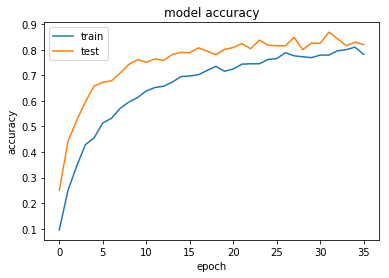

In [99]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()